# 

# <font size=6> STATISTIC CHALENGE - IA

# 

# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data

In [2]:
# Dicionário de faturamento
dict_faturamento = {
    'data_ref': [
        '2023-01-01', 
        '2020-02-01', 
        '2021-03-01', 
        '2022-04-01', 
        '2023-05-01',
        '2023-06-01', 
        '2020-07-01', 
        '2021-08-01', 
        '2022-09-01', 
        '2023-10-01',
        '2022-11-01', 
        '2023-12-01',
        ],
    'valor': [
        400000, 
        890000, 
        760000, 
        430000, 
        920000,
        340000, 
        800000, 
        500000, 
        200000, 
        900000,
        570000, 
        995000,
        ]
}

In [3]:
# Create dataframe from dict
df_faturamento = pd.DataFrame.from_dict(dict_faturamento)
df_faturamento.set_index('data_ref', inplace=True)

In [4]:
# View data frame
df_faturamento

,valor
data_ref,
2023-01-01,400000
2020-02-01,890000
2021-03-01,760000
2022-04-01,430000
2023-05-01,920000
2023-06-01,340000
2020-07-01,800000
2021-08-01,500000
2022-09-01,200000


---

# Estatic Summary

In [5]:
# Mean
df_faturamento.valor.mean().round(2)

642083.33

In [6]:
# Describe
df_faturamento.describe().round(2)

,valor
count,12.00
mean,642083.33
std,267015.99
min,200000.00
25%,422500.00
50%,665000.00
75%,892500.00
max,995000.00


### Número de classes - Regra de Sturges

## $$ k = 1 + \frac{10}{3}log_{10}n $$

In [7]:
# Calculate the number of classes
num_classes = df_faturamento.shape[0]

def k_sturges(serie):
    k = int(1 + (10/3) * np.log10(len(serie)))
    
    return k

# calc
k = k_sturges(df_faturamento.valor)

# View
k

4

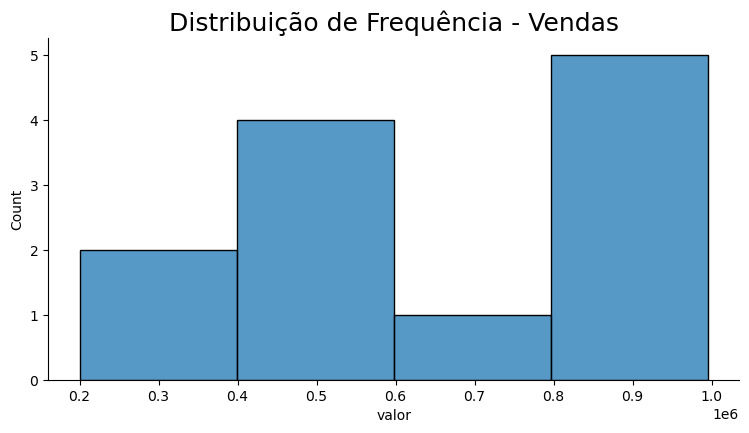

In [8]:
# Histogram
ax = sns.displot(df_faturamento, x="valor", kind="hist", bins=4)

ax.figure.set_size_inches(8, 4)
plt.title("Distribuição de Frequência - Vendas", fontsize=18)
plt.show()

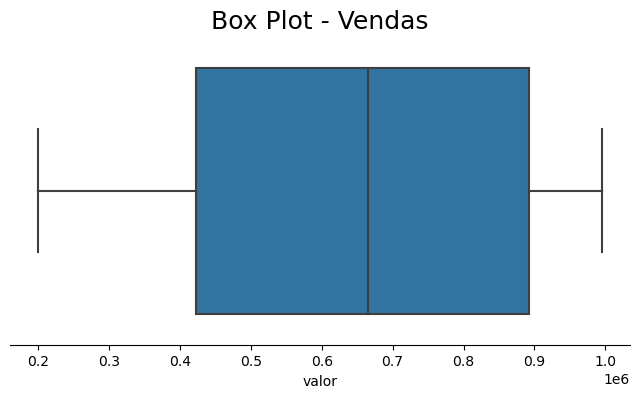

In [9]:
# Box plot
ax = sns.boxplot(x=df_faturamento.valor, orient="h")
ax.figure.set_size_inches(8, 4)

# Axis
for side in ['top', 'right', 'left']:
    plt.gca().spines[side].set_visible(False)


plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 
plt.title("Box Plot - Vendas", fontsize=18)
plt.show()

---

# Vertical Bar Chart

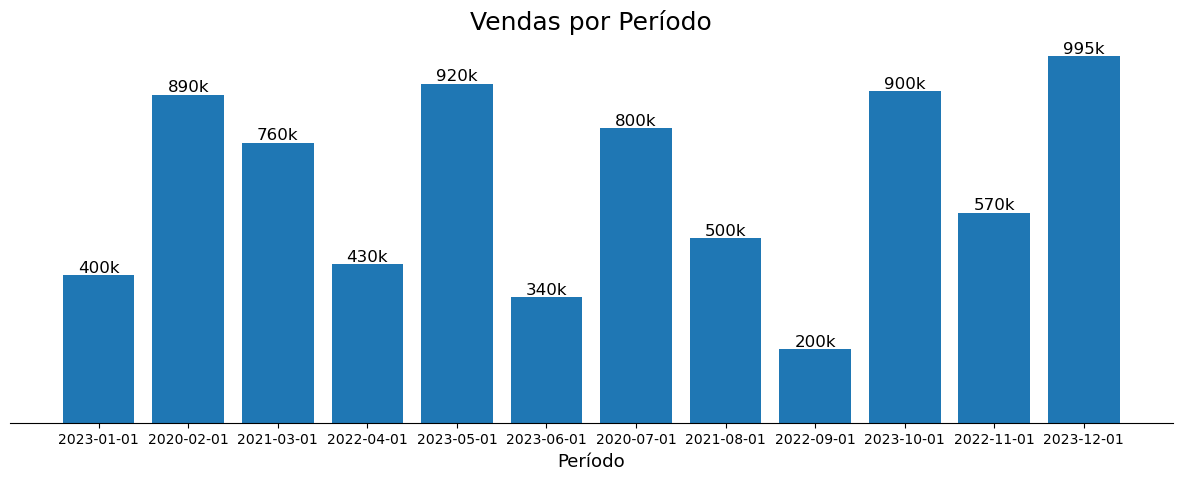

In [10]:
# Figure
plt.figure(figsize=(15,5))

# Plot bars
bars = plt.bar(df_faturamento.index, df_faturamento.valor)

# Add labels
plt.title('Vendas por Período', fontsize=18)
plt.xlabel('Período', fontsize=13)
plt.tick_params(axis='y', labelleft=False)

# Remove spines
plt.gca().spines[['top', 'right', 'left']].set_visible(False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False) 

# Add formatted data labels
for bar in bars:
    height = bar.get_height() / 1000 
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{height:.0f}k', 
             ha='center', va='bottom', fontsize=12)

# Show plot
plt.show()

# Line Chart

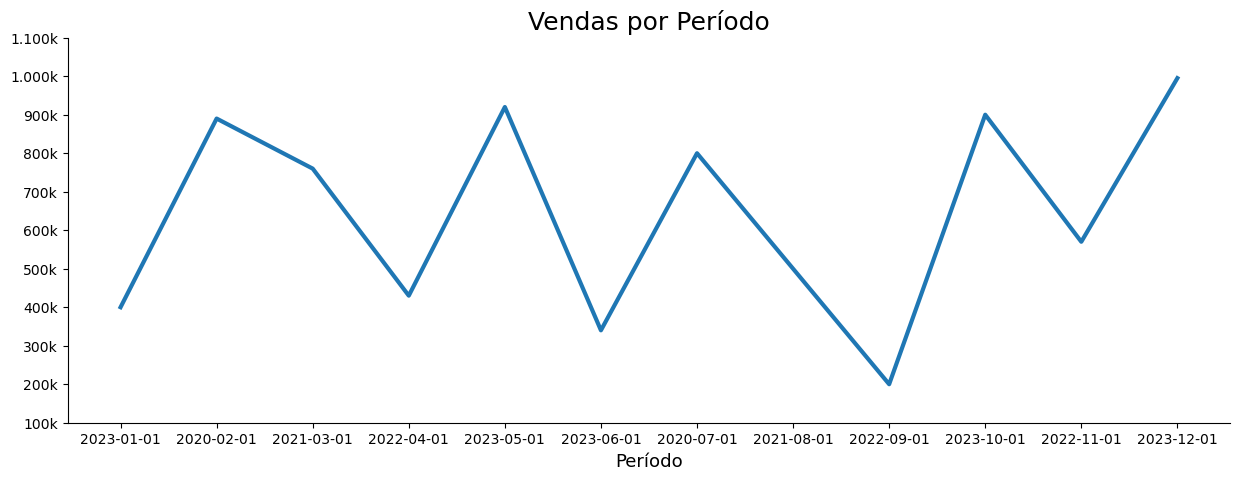

In [11]:
# Figure
plt.figure(figsize=(15,5))

# plot lines
plt.plot(df_faturamento.index, df_faturamento.valor, linewidth=3, label=2)

# labels
plt.title('Vendas por Período', fontsize=18)
plt.xlabel('Período', fontsize=13)
plt.gca().set_yticks(plt.gca().get_yticks())
plt.gca().set_yticklabels([f'{y:,.0f}'.replace(',', '.') + 'k' for y in plt.gca().get_yticks() / 1000])

# axis
for side in ['top', 'right']:
    plt.gca().spines[side].set_visible(False)

# show
plt.show()

---